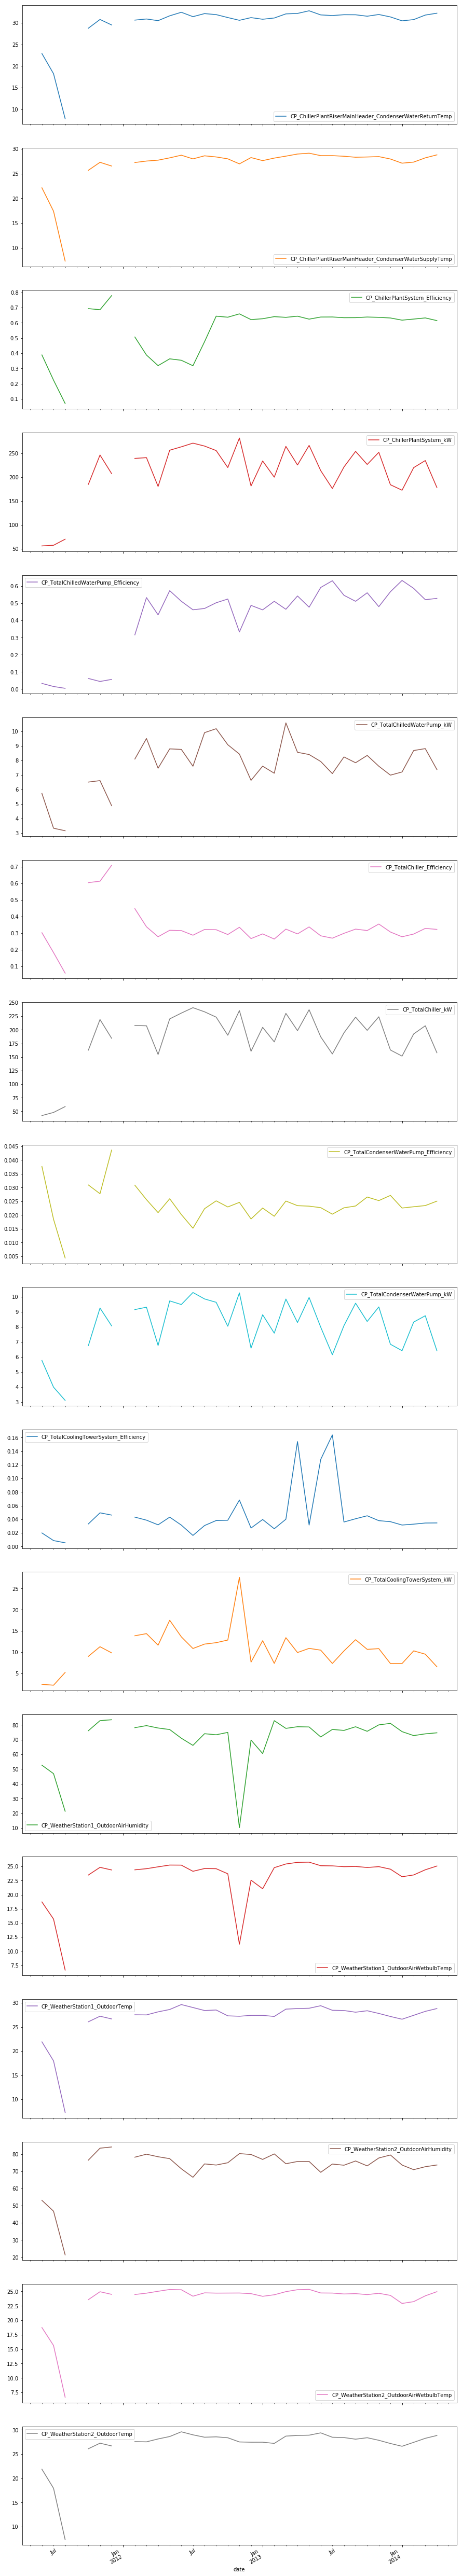

In [6]:
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt
import json
from sklearn import preprocessing
from sklearn.cluster import KMeans
from operator import itemgetter
import seaborn as sns

### read and drop the last column
cp_sys = pd.read_csv("./../FullRawChillerPlantSystem.csv", index_col="date", parse_dates=True)
cp_sys.drop('Unnamed: 0', axis=1, inplace=True)
sys_m_std = cp_sys.resample('M').std()
cp_sys = cp_sys.resample('M').mean()
cp_sys.plot(subplots=True, figsize=(15,100))
plt.show()

In [9]:
#print(sys_m_std['CP_ChillerPlantSystem_kW'])
cp_sys['sys_kw_std'] = sys_m_std['CP_ChillerPlantSystem_kW']
print(cp_sys)

            CP_ChillerPlantRiserMainHeader_CondenserWaterReturnTemp  \
date                                                                  
2011-06-30                                          22.902697         
2011-07-31                                          18.243116         
2011-08-31                                           7.852388         
2011-09-30                                                NaN         
2011-10-31                                          28.761156         
2011-11-30                                          30.777834         
2011-12-31                                          29.510059         
2012-01-31                                                NaN         
2012-02-29                                          30.631469         
2012-03-31                                          30.889244         
2012-04-30                                          30.503894         
2012-05-31                                          31.621115         
2012-0

In [10]:
### drop the lines that contains nan
cp_sys = cp_sys.dropna(axis=0)
cp_sys.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 33 entries, 2011-06-30 to 2014-04-30
Data columns (total 19 columns):
CP_ChillerPlantRiserMainHeader_CondenserWaterReturnTemp    33 non-null float64
CP_ChillerPlantRiserMainHeader_CondenserWaterSupplyTemp    33 non-null float64
CP_ChillerPlantSystem_Efficiency                           33 non-null float64
CP_ChillerPlantSystem_kW                                   33 non-null float64
CP_TotalChilledWaterPump_Efficiency                        33 non-null float64
CP_TotalChilledWaterPump_kW                                33 non-null float64
CP_TotalChiller_Efficiency                                 33 non-null float64
CP_TotalChiller_kW                                         33 non-null float64
CP_TotalCondenserWaterPump_Efficiency                      33 non-null float64
CP_TotalCondenserWaterPump_kW                              33 non-null float64
CP_TotalCoolingTowerSystem_Efficiency                      33 non-null float64
CP_Total

In [11]:
### drop the numbers that has 3 standard deviation from the mean
#CP_ChillerPlantRiserMainHeader_CondenserWaterReturnTemp 
conden_ret_tmp = cp_sys['CP_ChillerPlantRiserMainHeader_CondenserWaterReturnTemp']
conden_ret_tmp_clean = conden_ret_tmp[(conden_ret_tmp<(conden_ret_tmp.mean()+3*conden_ret_tmp.std())) 
                                      & (conden_ret_tmp>(conden_ret_tmp.mean()-3*conden_ret_tmp.std()))]
#CP_ChillerPlantRiserMainHeader_CondenserWaterSupplyTemp 
conden_sup_tmp = cp_sys['CP_ChillerPlantRiserMainHeader_CondenserWaterSupplyTemp']
conden_sup_tmp_clean = conden_sup_tmp[(conden_sup_tmp<(conden_sup_tmp.mean()+3*conden_sup_tmp.std()))
                                     & (conden_sup_tmp>(conden_sup_tmp.mean()-3*conden_sup_tmp.std()))]
#CP_WeatherStation1_OutdoorAirHumidity
sta1_air_hum = cp_sys['CP_WeatherStation1_OutdoorAirHumidity']
sta1_air_hum_clean = sta1_air_hum[(sta1_air_hum<(sta1_air_hum.mean()+3*sta1_air_hum.std()))
                                 & (sta1_air_hum>(sta1_air_hum.mean()-3*sta1_air_hum.std()))]
#CP_WeatherStation1_OutdoorAirWetbulbTemp  
sta1_air_wetemp = cp_sys['CP_WeatherStation1_OutdoorAirWetbulbTemp']
sta1_air_wetemp_clean = sta1_air_wetemp[(sta1_air_wetemp<(sta1_air_wetemp.mean()+3*sta1_air_wetemp.std()))
                                       & (sta1_air_wetemp>(sta1_air_wetemp.mean()-3*sta1_air_wetemp.std()))]
#CP_WeatherStation1_OutdoorTemp
sta1_air_outmp = cp_sys['CP_WeatherStation1_OutdoorTemp']
sta1_air_outmp_clean = sta1_air_outmp[(sta1_air_outmp<(sta1_air_outmp.mean()+3*sta1_air_outmp.std()))
                                     & (sta1_air_outmp>(sta1_air_outmp.mean()-3*sta1_air_outmp.std()))]
#CP_WeatherStation2_OutdoorAirHumidity 
sta2_air_hum = cp_sys['CP_WeatherStation2_OutdoorAirHumidity']
sta2_air_hum_clean = sta2_air_hum[(sta2_air_hum<(sta2_air_hum.mean()+3*sta2_air_hum.std()))
                                 & (sta2_air_hum>(sta2_air_hum.mean()-3*sta2_air_hum.std()))]
#CP_WeatherStation2_OutdoorAirWetbulbTemp  
sta2_air_wetemp = cp_sys['CP_WeatherStation2_OutdoorAirWetbulbTemp']
sta2_air_wetemp_clean = sta2_air_wetemp[(sta2_air_wetemp<(sta2_air_wetemp.mean()+3*sta2_air_wetemp.std()))
                                       & (sta2_air_wetemp>(sta2_air_wetemp.mean()-3*sta2_air_wetemp.std()))]
#CP_WeatherStation2_OutdoorTemp
sta2_air_outmp = cp_sys['CP_WeatherStation2_OutdoorTemp']
sta2_air_outmp_clean = sta2_air_outmp[(sta2_air_outmp<(sta2_air_outmp.mean()+3*sta2_air_outmp.std()))
                                     & (sta2_air_outmp>(sta2_air_outmp.mean()-3*sta2_air_outmp.std()))]
#std
sys_kw_std = cp_sys['sys_kw_std']
sys_kw_std_clean = sys_kw_std[(sys_kw_std<(sys_kw_std.mean()+3*sys_kw_std.std()))
                                     & (sys_kw_std>(sys_kw_std.mean()-3*sys_kw_std.std()))]

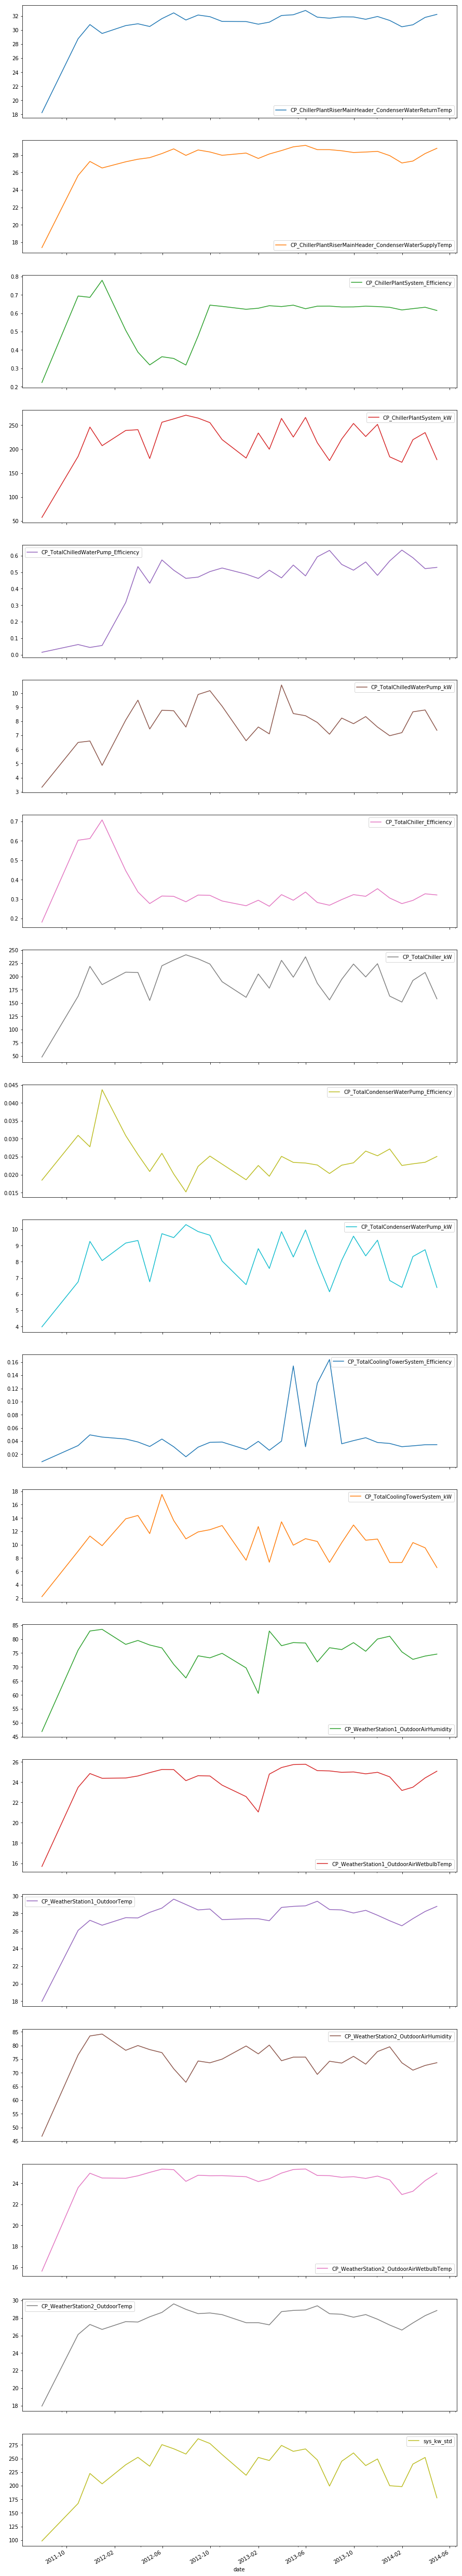

In [12]:
### create a new dataframe with the new series
CP_ChillerPlantRiserMainHeader_CondenserWaterReturnTemp = pd.DataFrame(conden_ret_tmp_clean)
CP_ChillerPlantRiserMainHeader_CondenserWaterSupplyTemp = pd.DataFrame(conden_sup_tmp_clean)
CP_ChillerPlantSystem_Efficiency = pd.DataFrame(cp_sys['CP_ChillerPlantSystem_Efficiency'])
CP_ChillerPlantSystem_kW = pd.DataFrame(cp_sys['CP_ChillerPlantSystem_kW'])
CP_TotalChilledWaterPump_Efficiency = pd.DataFrame(cp_sys['CP_TotalChilledWaterPump_Efficiency'])
CP_TotalChilledWaterPump_kW = pd.DataFrame(cp_sys['CP_TotalChilledWaterPump_kW'])
CP_TotalChiller_Efficiency = pd.DataFrame(cp_sys['CP_TotalChiller_Efficiency'])
CP_TotalChiller_kW = pd.DataFrame(cp_sys['CP_TotalChiller_kW'])
CP_TotalCondenserWaterPump_Efficiency = pd.DataFrame(cp_sys['CP_TotalCondenserWaterPump_Efficiency'])
CP_TotalCondenserWaterPump_kW = pd.DataFrame(cp_sys['CP_TotalCondenserWaterPump_kW'])
CP_TotalCoolingTowerSystem_Efficiency = pd.DataFrame(cp_sys['CP_TotalCoolingTowerSystem_Efficiency'])
CP_TotalCoolingTowerSystem_kW = pd.DataFrame(cp_sys['CP_TotalCoolingTowerSystem_kW'])
CP_WeatherStation1_OutdoorAirHumidity = pd.DataFrame(sta1_air_hum_clean)
CP_WeatherStation1_OutdoorAirWetbulbTemp = pd.DataFrame(sta1_air_wetemp_clean)
CP_WeatherStation1_OutdoorTemp = pd.DataFrame(sta1_air_outmp_clean)
CP_WeatherStation2_OutdoorAirHumidity = pd.DataFrame(sta2_air_hum_clean)
CP_WeatherStation2_OutdoorAirWetbulbTemp = pd.DataFrame(sta2_air_wetemp_clean)
CP_WeatherStation2_OutdoorTemp = pd.DataFrame(sta2_air_outmp_clean)
sys_kw_std_new = pd.DataFrame(sys_kw_std_clean)
cp_sys_clean = pd.concat([CP_ChillerPlantRiserMainHeader_CondenserWaterReturnTemp,
                   CP_ChillerPlantRiserMainHeader_CondenserWaterSupplyTemp,
                   CP_ChillerPlantSystem_Efficiency,
                   CP_ChillerPlantSystem_kW,
                   CP_TotalChilledWaterPump_Efficiency,
                   CP_TotalChilledWaterPump_kW,
                   CP_TotalChiller_Efficiency,
                   CP_TotalChiller_kW,
                   CP_TotalCondenserWaterPump_Efficiency,
                   CP_TotalCondenserWaterPump_kW,
                   CP_TotalCoolingTowerSystem_Efficiency,
                   CP_TotalCoolingTowerSystem_kW,
                   CP_WeatherStation1_OutdoorAirHumidity,
                   CP_WeatherStation1_OutdoorAirWetbulbTemp,
                   CP_WeatherStation1_OutdoorTemp,
                   CP_WeatherStation2_OutdoorAirHumidity,
                   CP_WeatherStation2_OutdoorAirWetbulbTemp,
                   CP_WeatherStation2_OutdoorTemp,
                   sys_kw_std_new],axis=1).dropna(axis=0)
cp_sys_clean.plot(subplots=True,figsize=(15,100))
plt.show()

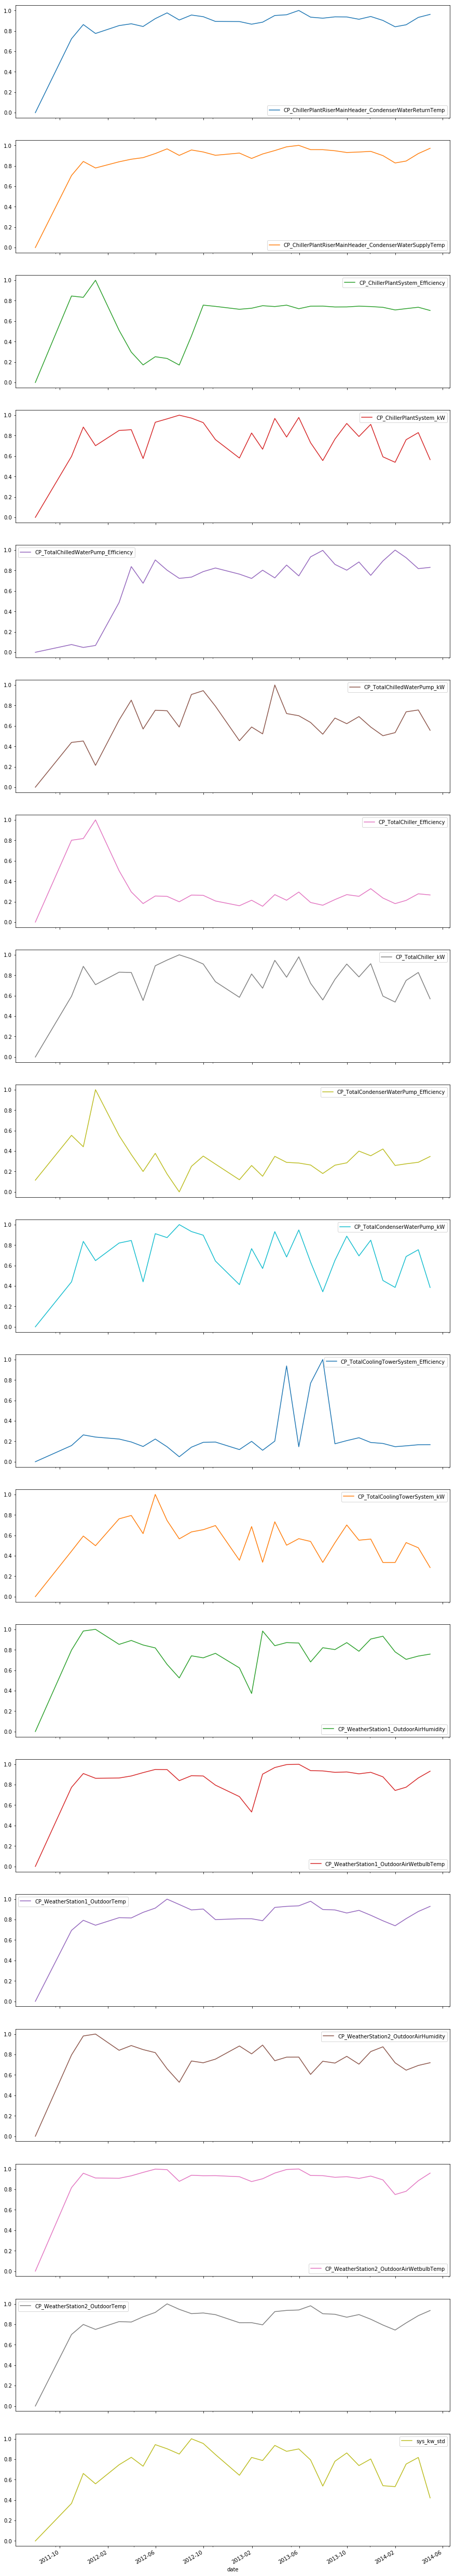

In [13]:
### scale the data into [0,1]
min_max_scaler = preprocessing.MinMaxScaler()
s_con_ret_tmp = pd.DataFrame(min_max_scaler.fit_transform(cp_sys_clean["CP_ChillerPlantRiserMainHeader_CondenserWaterReturnTemp"].values.reshape(-1,1)),
                            columns=["CP_ChillerPlantRiserMainHeader_CondenserWaterReturnTemp"],
                            index=cp_sys_clean.index)
s_con_sup_tmp = pd.DataFrame(min_max_scaler.fit_transform(cp_sys_clean["CP_ChillerPlantRiserMainHeader_CondenserWaterSupplyTemp"].values.reshape(-1,1)),
                            columns=["CP_ChillerPlantRiserMainHeader_CondenserWaterSupplyTemp"],
                            index=cp_sys_clean.index)
s_ch_sys_eff = pd.DataFrame(min_max_scaler.fit_transform(cp_sys_clean["CP_ChillerPlantSystem_Efficiency"].values.reshape(-1,1)),
                            columns=["CP_ChillerPlantSystem_Efficiency"],
                            index=cp_sys_clean.index)
s_ch_sys_kw = pd.DataFrame(min_max_scaler.fit_transform(cp_sys_clean["CP_ChillerPlantSystem_kW"].values.reshape(-1,1)),
                            columns=["CP_ChillerPlantSystem_kW"],
                            index=cp_sys_clean.index)
s_ch_pump_eff = pd.DataFrame(min_max_scaler.fit_transform(cp_sys_clean["CP_TotalChilledWaterPump_Efficiency"].values.reshape(-1,1)),
                            columns=["CP_TotalChilledWaterPump_Efficiency"],
                            index=cp_sys_clean.index)
s_ch_pump_kw = pd.DataFrame(min_max_scaler.fit_transform(cp_sys_clean["CP_TotalChilledWaterPump_kW"].values.reshape(-1,1)),
                            columns=["CP_TotalChilledWaterPump_kW"],
                            index=cp_sys_clean.index)
s_tot_chi_eff = pd.DataFrame(min_max_scaler.fit_transform(cp_sys_clean["CP_TotalChiller_Efficiency"].values.reshape(-1,1)),
                            columns=["CP_TotalChiller_Efficiency"],
                            index=cp_sys_clean.index)
s_tot_chi_kw = pd.DataFrame(min_max_scaler.fit_transform(cp_sys_clean["CP_TotalChiller_kW"].values.reshape(-1,1)),
                            columns=["CP_TotalChiller_kW"],
                            index=cp_sys_clean.index)
s_con_pump_eff = pd.DataFrame(min_max_scaler.fit_transform(cp_sys_clean["CP_TotalCondenserWaterPump_Efficiency"].values.reshape(-1,1)),
                            columns=["CP_TotalCondenserWaterPump_Efficiency"],
                            index=cp_sys_clean.index)
s_con_pump_kw = pd.DataFrame(min_max_scaler.fit_transform(cp_sys_clean["CP_TotalCondenserWaterPump_kW"].values.reshape(-1,1)),
                            columns=["CP_TotalCondenserWaterPump_kW"],
                            index=cp_sys_clean.index)
s_tow_sys_eff = pd.DataFrame(min_max_scaler.fit_transform(cp_sys_clean["CP_TotalCoolingTowerSystem_Efficiency"].values.reshape(-1,1)),
                            columns=["CP_TotalCoolingTowerSystem_Efficiency"],
                            index=cp_sys_clean.index)
s_tow_sys_kw = pd.DataFrame(min_max_scaler.fit_transform(cp_sys_clean["CP_TotalCoolingTowerSystem_kW"].values.reshape(-1,1)),
                            columns=["CP_TotalCoolingTowerSystem_kW"],
                            index=cp_sys_clean.index)
s_stat1_air_hum = pd.DataFrame(min_max_scaler.fit_transform(cp_sys_clean["CP_WeatherStation1_OutdoorAirHumidity"].values.reshape(-1,1)),
                            columns=["CP_WeatherStation1_OutdoorAirHumidity"],
                            index=cp_sys_clean.index)
s_stat1_wet_tmp = pd.DataFrame(min_max_scaler.fit_transform(cp_sys_clean["CP_WeatherStation1_OutdoorAirWetbulbTemp"].values.reshape(-1,1)),
                            columns=["CP_WeatherStation1_OutdoorAirWetbulbTemp"],
                            index=cp_sys_clean.index)
s_stat1_out_tmp = pd.DataFrame(min_max_scaler.fit_transform(cp_sys_clean["CP_WeatherStation1_OutdoorTemp"].values.reshape(-1,1)),
                            columns=["CP_WeatherStation1_OutdoorTemp"],
                            index=cp_sys_clean.index)
s_stat2_air_hum = pd.DataFrame(min_max_scaler.fit_transform(cp_sys_clean["CP_WeatherStation2_OutdoorAirHumidity"].values.reshape(-1,1)),
                            columns=["CP_WeatherStation2_OutdoorAirHumidity"],
                            index=cp_sys_clean.index)
s_stat2_wet_tmp = pd.DataFrame(min_max_scaler.fit_transform(cp_sys_clean["CP_WeatherStation2_OutdoorAirWetbulbTemp"].values.reshape(-1,1)),
                            columns=["CP_WeatherStation2_OutdoorAirWetbulbTemp"],
                            index=cp_sys_clean.index)
s_stat2_out_tmp = pd.DataFrame(min_max_scaler.fit_transform(cp_sys_clean["CP_WeatherStation2_OutdoorTemp"].values.reshape(-1,1)),
                            columns=["CP_WeatherStation2_OutdoorTemp"],
                            index=cp_sys_clean.index)
s_sys_kw_std = pd.DataFrame(min_max_scaler.fit_transform(cp_sys_clean["sys_kw_std"].values.reshape(-1,1)),
                            columns=["sys_kw_std"],
                            index=cp_sys_clean.index)
s_cp_sys_clean = pd.concat([s_con_ret_tmp,
                           s_con_sup_tmp,
                           s_ch_sys_eff,
                           s_ch_sys_kw,
                           s_ch_pump_eff,
                           s_ch_pump_kw,
                           s_tot_chi_eff,
                           s_tot_chi_kw,
                           s_con_pump_eff,
                           s_con_pump_kw,
                           s_tow_sys_eff,
                           s_tow_sys_kw,
                           s_stat1_air_hum,
                           s_stat1_wet_tmp,
                           s_stat1_out_tmp,
                           s_stat2_air_hum,
                           s_stat2_wet_tmp,
                           s_stat2_out_tmp,
                           s_sys_kw_std],axis=1)
s_cp_sys_clean.plot(subplots=True,figsize=(15,100))
plt.show()

In [16]:
s_cp_sys_clean.info()
fit_in_data = pd.concat([s_ch_sys_kw,s_sys_kw_std],axis=1)

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 30 entries, 2011-07-31 to 2014-04-30
Data columns (total 19 columns):
CP_ChillerPlantRiserMainHeader_CondenserWaterReturnTemp    30 non-null float64
CP_ChillerPlantRiserMainHeader_CondenserWaterSupplyTemp    30 non-null float64
CP_ChillerPlantSystem_Efficiency                           30 non-null float64
CP_ChillerPlantSystem_kW                                   30 non-null float64
CP_TotalChilledWaterPump_Efficiency                        30 non-null float64
CP_TotalChilledWaterPump_kW                                30 non-null float64
CP_TotalChiller_Efficiency                                 30 non-null float64
CP_TotalChiller_kW                                         30 non-null float64
CP_TotalCondenserWaterPump_Efficiency                      30 non-null float64
CP_TotalCondenserWaterPump_kW                              30 non-null float64
CP_TotalCoolingTowerSystem_Efficiency                      30 non-null float64
CP_Total

            CP_ChillerPlantSystem_kW
date                                
2011-07-31                  0.000000
2011-10-31                  0.597048
2011-11-30                  0.883627
2011-12-31                  0.701562
2012-02-29                  0.850543
2012-03-31                  0.857975
2012-04-30                  0.576071
2012-05-31                  0.930693
2012-06-30                  0.963976
2012-07-31                  1.000000
2012-08-31                  0.971427
2012-09-30                  0.927219
2012-10-31                  0.761162
2012-12-31                  0.580692
2013-01-31                  0.825640
2013-02-28                  0.666837
2013-03-31                  0.968312
2013-04-30                  0.786109
2013-05-31                  0.977825
2013-06-30                  0.730482
2013-07-31                  0.555960
2013-08-31                  0.766508
2013-09-30                  0.919200
2013-10-31                  0.791271
2013-11-30                  0.910136
2

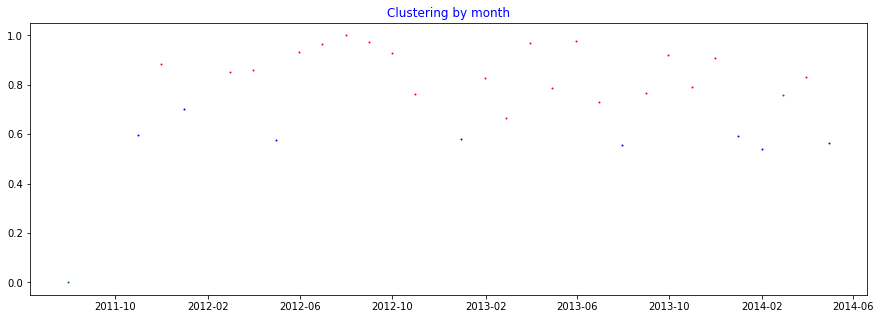

In [17]:
### using kmeans
k=3
kmeans = KMeans(n_clusters=k,random_state=0).fit(fit_in_data)
label = kmeans.labels_
numSamples = len(s_ch_sys_kw)
centroids = kmeans.labels_
mark = ['or','ob','og','ok','oy']
print(s_ch_sys_kw)

fig1 = plt.figure(figsize=(15,5))
ax1 = fig1.add_subplot(1,1,1)
#plt.xticks(pd.date_range('2011-06-09','2014-04-09'),rotation=90)    
plt.title('Clustering by day',color='blue')

for i in range(numSamples):
    plt.plot(s_ch_sys_kw.index[i],s_ch_sys_kw.iloc[i],mark[label[i]],markersize=1)

plt.title('Clustering by month',color='blue')
plt.show()